In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv
/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv


In [6]:
filepath='/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv'
palmer= pd.read_csv(filepath)

In [7]:
palmer.head(2)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


In [8]:
palmer.isnull().sum()
# To check whether the data has any null values. Need to refine the data


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
palmer.fillna(palmer.mean(),inplace=True)
palmer.isnull().sum()


species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

In [10]:
palmer.head()
X =palmer.iloc[:, 2:-2].values
y =palmer.iloc[:,0].values
X



array([[ 39.1,  18.7, 181. ],
       [ 39.5,  17.4, 186. ],
       [ 40.3,  18. , 195. ],
       ...,
       [ 50.4,  15.7, 222. ],
       [ 45.2,  14.8, 212. ],
       [ 49.9,  16.1, 213. ]])

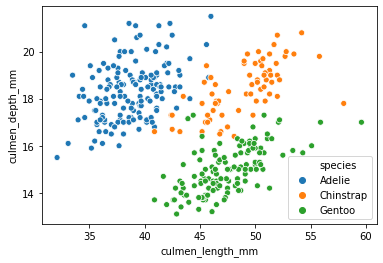

In [8]:

sns.scatterplot(x=palmer['culmen_length_mm'],y=palmer['culmen_depth_mm'],hue=palmer['species'])


# From the plot we can visualize that the Adelie species tend to have shorter beaks but are very thick
# It can be one of their distinguishing feature.

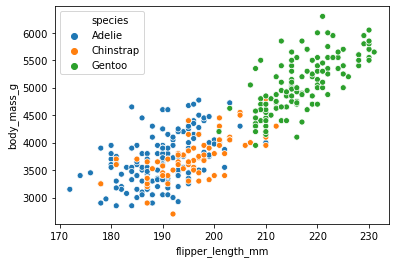

In [23]:
sns.scatterplot(x=palmer['flipper_length_mm'],y=palmer['body_mass_g'],hue=palmer['species'])
# Flipper Length and the BMI is a bad one for classification

Text(0.5, 1.0, 'Palmer Heroes')

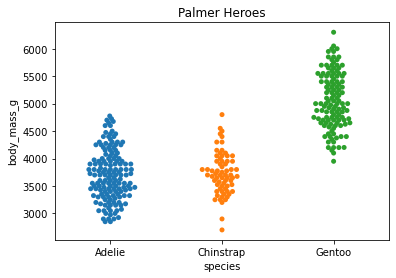

In [24]:
sns.swarmplot(x='species',y='body_mass_g',data=palmer)
plt.title('Palmer Heroes')

In [ ]:
sns.pairplot(data=palmer,hue='species')

In [9]:
palmer.shape

(344, 7)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
LogR =LogisticRegression()
gnb=GaussianNB()

In [17]:
# For preprocessing purposes here i have already imputed some so teh accuracy is the same whether i use standard scaler or not
scaler=StandardScaler()
scaler.fit(x_train)
x_train =scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [19]:
# Train and fit the model
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
model =RandomForestClassifier(n_estimators=50)
#model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
pred=model.predict(x_test)
Final_Acc =(accuracy_score(pred,y_test))
print('The final accuracy of your model is',accuracy_score(pred,y_test))
print('See the matrix:',confusion_matrix(pred,y_test))

# Random Forest has better accuracy here than kneighbors
# Maybe it kills the overfittin.



The final accuracy of your model is 0.9903846153846154
See the matrix: [[51  1  0]
 [ 0 15  0]
 [ 0  0 37]]
